In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from heterogeneity_analysis import Grouping

In [24]:
DATA_FOLDER = 'data/'
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')
block_model = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')
collar = pd.read_csv(f'{DATA_FOLDER}BS_collar.csv')
old_lith = pd.read_csv(f'{DATA_FOLDER}BS_old_lith.csv')
relog_geo = pd.read_csv(f'{DATA_FOLDER}BS_relog_geology.csv')
survey = pd.read_csv(f'{DATA_FOLDER}BS_survey.csv')

In [25]:
assay.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
SAMPFROM,10525.0,155.97,124.26,0.00,59.66,124.60,222.00,693.00
SAMPTO,10525.0,158.26,124.28,0.46,61.90,126.76,224.30,696.00
AG_PPM_OLDISKUT,10328.0,10.56,533.72,-9.00,0.70,1.50,3.43,54196.00
AS_PPM_OLDISKUT,4038.0,307.58,1660.36,-9.00,31.00,52.00,130.75,58800.00
BA_PPM_OLDISKUT,2820.0,495.05,503.07,-9.00,112.00,217.50,850.00,3720.00
BI_PPM_OLDISKUT,4038.0,10.90,47.35,-9.00,1.00,2.50,6.00,1516.00
CD_PPM_OLDISKUT,4038.0,23.47,78.86,-9.00,0.60,4.00,14.48,2000.00
CO_PPM_OLDISKUT,4038.0,21.66,40.51,-9.00,10.00,15.00,21.00,1070.00
CR_PPM_OLDISKUT,4038.0,65.70,67.53,-9.00,21.00,42.00,84.00,622.00
CU_PCT_OLDISKUT,10306.0,0.09,0.27,-9.00,0.01,0.03,0.10,16.30


In [26]:
len(assay.HOLEID.unique())

194

In [27]:
print(len(assay), len(block_model), len(collar), len(old_lith), len(relog_geo), len(survey))

10527 404919 234 40845 221 937


In [28]:
assay.head(1)

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
0,1198,3.0,8.0,2.6,NaN,0.375,NaN,NaN,NaN,NaN,...,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,High,High


In [29]:
print(assay.isna().any())

HOLEID               False
SAMPFROM              True
SAMPTO                True
AG_PPM_OLDISKUT       True
AS_PPM_OLDISKUT       True
AU_PPM_OLDISKUT      False
BA_PPM_OLDISKUT       True
BI_PPM_OLDISKUT       True
CD_PPM_OLDISKUT       True
CO_PPM_OLDISKUT       True
CR_PPM_OLDISKUT       True
CU_PCT_OLDISKUT       True
FE_PCT_OLDISKUT       True
K_PCT_OLDISKUT        True
MO_PCT_OLDISKUT       True
NA_PCT_OLDISKUT       True
PB_PCT_OLDISKUT       True
S_PCT_OLDISKUT        True
SB_PPM_OLDISKUT       True
Comment               True
Veins                 True
Snip_Veins            True
Snip_veins_sorted     True
dtype: bool


In [30]:
assay[assay.SAMPFROM.isna()]

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
10500,UG21-212,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN
10526,UG21-217,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN


In [31]:
assay.columns

Index(['HOLEID', 'SAMPFROM', 'SAMPTO', 'AG_PPM_OLDISKUT', 'AS_PPM_OLDISKUT',
       'AU_PPM_OLDISKUT', 'BA_PPM_OLDISKUT', 'BI_PPM_OLDISKUT',
       'CD_PPM_OLDISKUT', 'CO_PPM_OLDISKUT', 'CR_PPM_OLDISKUT',
       'CU_PCT_OLDISKUT', 'FE_PCT_OLDISKUT', 'K_PCT_OLDISKUT',
       'MO_PCT_OLDISKUT', 'NA_PCT_OLDISKUT', 'PB_PCT_OLDISKUT',
       'S_PCT_OLDISKUT', 'SB_PPM_OLDISKUT', 'Comment', 'Veins', 'Snip_Veins',
       'Snip_veins_sorted'],
      dtype='object')

In [32]:
# The Au column was not a float column. This forces the data to be columns.
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
clean_assay.dtypes

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_99728/691470644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_99728/4106083693.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


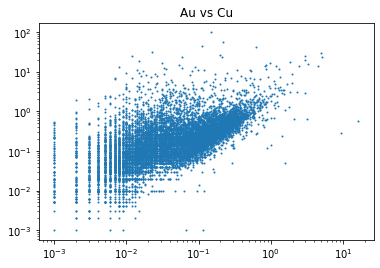

In [33]:
fig, ax = plt.subplots()

x = clean_assay.CU_PCT_OLDISKUT
y = clean_assay.AU_PPM_OLDISKUT


ax.scatter(x, y, s=1)
    
    
ax.set_title("Au vs Cu")
# ax.set_xlim(0.0001, 20)
ax.set_xscale("log")
# ax.set_ylim(0.001, 100)
ax.set_yscale("log")

fig.show()

In [34]:
len(old_lith.Lith_grouped.unique())

12

In [35]:
# First, get the data
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')  # here is the assay data

# Display metadata
assay.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
SAMPFROM,10525.0,155.97,124.26,0.00,59.66,124.60,222.00,693.00
SAMPTO,10525.0,158.26,124.28,0.46,61.90,126.76,224.30,696.00
AG_PPM_OLDISKUT,10328.0,10.56,533.72,-9.00,0.70,1.50,3.43,54196.00
AS_PPM_OLDISKUT,4038.0,307.58,1660.36,-9.00,31.00,52.00,130.75,58800.00
BA_PPM_OLDISKUT,2820.0,495.05,503.07,-9.00,112.00,217.50,850.00,3720.00
BI_PPM_OLDISKUT,4038.0,10.90,47.35,-9.00,1.00,2.50,6.00,1516.00
CD_PPM_OLDISKUT,4038.0,23.47,78.86,-9.00,0.60,4.00,14.48,2000.00
CO_PPM_OLDISKUT,4038.0,21.66,40.51,-9.00,10.00,15.00,21.00,1070.00
CR_PPM_OLDISKUT,4038.0,65.70,67.53,-9.00,21.00,42.00,84.00,622.00
CU_PCT_OLDISKUT,10306.0,0.09,0.27,-9.00,0.01,0.03,0.10,16.30


In [36]:
# Then clean the data
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]
clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
# print(clean_assay.dtypes)
# Hopefully all the things that we want to keep numerical are now numerical

# Remove negative grades
clean_assay = clean_assay[clean_assay['AU_PPM_OLDISKUT'] >= 0]

clean_assay.describe().transpose().round(2)

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_99728/146264058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


,count,mean,std,min,25%,50%,75%,max
SAMPFROM,10519.0,156.01,124.27,0.00,59.68,124.60,222.00,693.00
SAMPTO,10519.0,158.29,124.30,0.46,61.93,126.80,224.30,696.00
AG_PPM_OLDISKUT,10323.0,10.57,533.85,0.00,0.70,1.50,3.43,54196.00
AS_PPM_OLDISKUT,4037.0,307.65,1660.56,1.00,31.00,52.00,131.00,58800.00
AU_PPM_OLDISKUT,10519.0,0.79,9.32,0.00,0.07,0.16,0.38,693.00
BA_PPM_OLDISKUT,2819.0,495.23,503.07,10.00,112.00,218.00,850.00,3720.00
BI_PPM_OLDISKUT,4037.0,10.90,47.35,1.00,1.00,2.50,6.00,1516.00
CD_PPM_OLDISKUT,4037.0,23.48,78.87,0.30,0.60,4.00,14.50,2000.00
CO_PPM_OLDISKUT,4037.0,21.67,40.52,0.50,10.00,15.00,21.00,1070.00
CR_PPM_OLDISKUT,4037.0,65.72,67.53,0.50,21.00,42.00,84.00,622.00


In [37]:
assay = clean_assay

In [38]:
# Sort the data into drillholes
hole_ids = assay.HOLEID.unique()

resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT",
    "Ag": "AG_PPM_OLDISKUT",
    "Mo": "MO_PCT_OLDISKUT"
}

# currently creating a dictionary with the DataFrame queries, but we can create an object instead
drillholes = {}
for hole_id in hole_ids:
    dh = drillholes[hole_id] = Grouping(hole_id)
    df = assay.query("HOLEID == @hole_id")
    weights = list(np.subtract(df.SAMPTO, df.SAMPFROM))
    
    for resource_id, column_id in resources.items():
        grades = df[column_id].to_list()
        dh.calculate_resource_heterogeneity(resource_id, weights, grades)

# Calculate constitutional heterogeneity, and distributional heterogeneity

In [39]:
import os

OUTPUT = "./output"

if not os.path.isdir(OUTPUT):
    os.mkdir(OUTPUT)

for resource_id in resources.keys():
    if not os.path.isdir(f"{OUTPUT}/{resource_id}"):
        os.mkdir(f"{OUTPUT}/{resource_id}")
    for dh_id, dh in drillholes.items():
        dh.resources[resource_id].info.to_csv(f"{OUTPUT}/{resource_id}/{dh_id}.csv")

In [40]:
drillholes["1198"].resources["Cu"].cons_het

0.19140545769640363

In [41]:
survey_dhs = survey.HOLEID.unique()
collar_dhs = collar.HOLEID.unique()
assay_dhs = assay.HOLEID.unique()

blacklist = []
for dh in survey_dhs:
    if dh not in collar_dhs:
        blacklist.append(dh)
        
for dh in assay_dhs:
    if dh not in collar_dhs:
        blacklist.append(dh)
        
# We blacklist all the data that does not have assay, collar, and survey entries

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_99728/3440326453.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


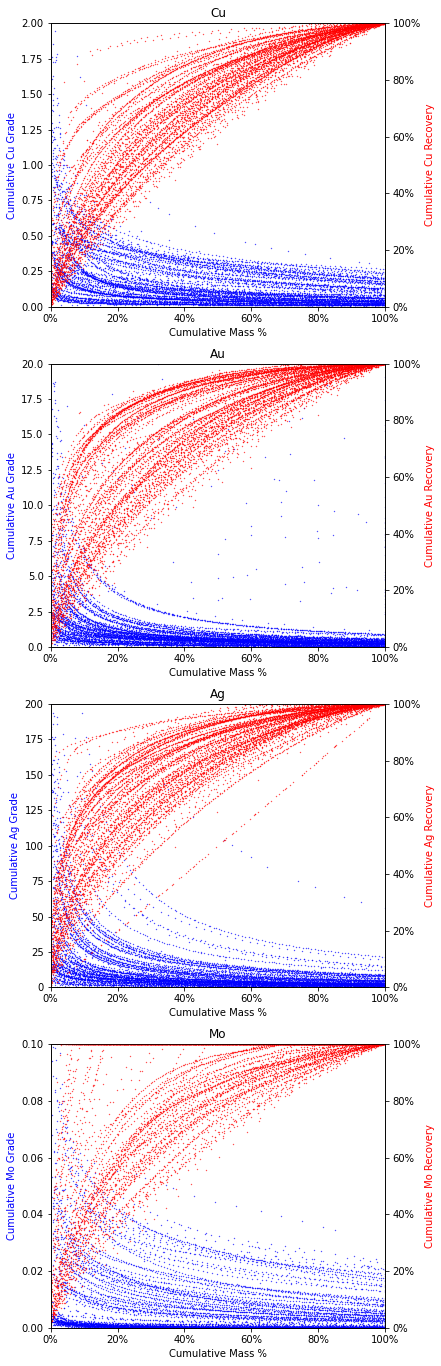

In [42]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    ax_sec = ax.twinx()
    
    ax.set_title(resource_id)
    
    for dh_id in drillholes.keys():
        if dh_id not in blacklist:
            df = drillholes[dh_id].resources[resource_id].info

            x = df['cml_weight_pct']
            y = df['cml_grade']
            ax.scatter(x, y, color='blue', s=0.1)
            
            y = df['cml_recovery']
            ax_sec.scatter(x, y, color='red', s=0.1)
    
    
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
        pass
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
    elif resource_id == "Ag":
        ax.set_ylim(0, 200)
    elif resource_id == "Mo":
        ax.set_ylim(0, 0.1)
        
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.show()

In [43]:
fig.savefig("charts.png")

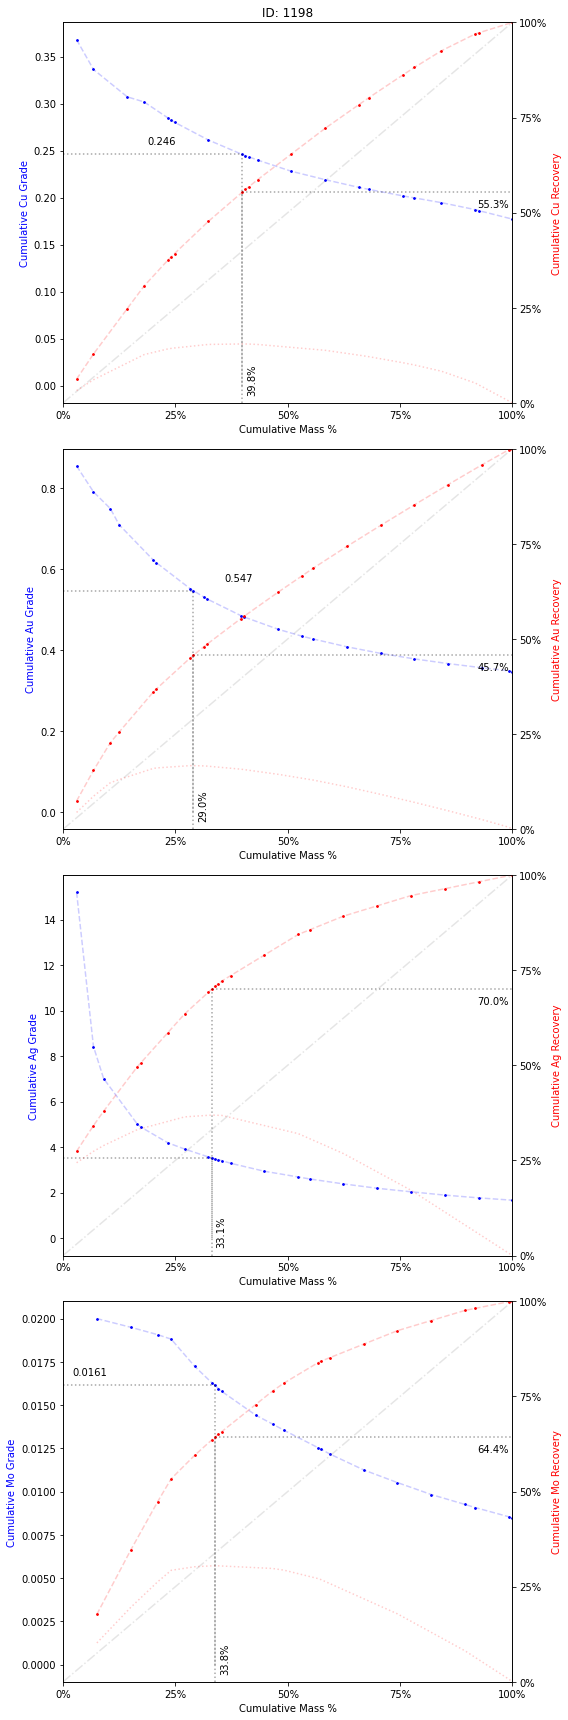

In [44]:
dh_id = '1198'

fig = drillholes[dh_id].plot_grade_recovery_curves()

fig.tight_layout()
fig.savefig('sample.svg')

In [192]:
collar_dhs = collar.HOLEID.unique()

len(collar_dhs)
for dh_id in hole_ids:
    if dh_id not in collar_dhs:
        print(dh_id)

UG17-001
UG17-002
UG17-003
UG17-006
UG17-007
UG17-008
UG17-009
UG17-004
UG17-005
UG17-010
UG17-011
UG17-012
UG17-013
UG17-014
UG17-015
UG17-016
UG17-017


In [193]:
DATA_FOLDER = 'data/'
bm = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')

bm.rename(columns = {
    'X': 'x', 
    'Y': 'y',
    'Z': 'z'
}, inplace = True)

bm_flat = {}
for idx, row in bm.iterrows():
    x, y, z = row.x, row.y, row.z
    if (x, y) in bm_flat:
        bm_flat[(x, y)] = min(bm_flat[(x, y)], z)
    else:
        bm_flat[(x, y)] = z
        
keys = np.array(list(bm_flat.keys()), dtype=np.dtype('float, float'))
x, y = keys['f0'], keys['f1']
z = np.array(list(bm_flat.values()))

Text(0, 0.5, 'Y')

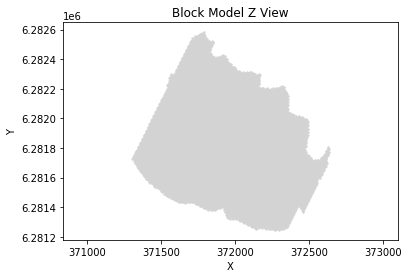

In [194]:
template_fig, template_ax = plt.subplots(1)
s = 2

ax = template_ax
ax.axis('equal')
ax.scatter(x, y, c='lightgrey', s=s)
ax.set_title("Block Model Z View")
ax.set_xlabel("X")
ax.set_ylabel("Y")

In [195]:
# # fig, ax = plt.subplots()
# fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))
# # cmaps = {
# #     'Cu': 'copper',
# #     'Au': 'autumn',
# #     'Ag': 'winter',
# #     'Mo': 'spring'
# # }

# for i, resource_id in enumerate(resources.keys()):
#     ax = axs[i]
    
#     ax.axis('equal')
#     ax.scatter(x, y, c=z, cmap='gist_earth', s=s)
#     ax.set_title("Block Model Z View")
#     ax.set_xlabel("X")
#     ax.set_ylabel("Y")
    
#     data = []
#     for index, row in collar.iterrows():
#         hole_id = row['HOLEID']
#         if hole_id in hole_ids:
#             data.append([row['EAST'], row['NORTH'], drillholes[hole_id].resources[resource_id].cons_het])
            
#     df = pd.DataFrame(data, columns=['x', 'y', 'cons_het'])
#     df = df.dropna(axis=0)
#     capped_cons_het = np.minimum(df.cons_het, 2)
#     ax.scatter(df.x, df.y, s=20, c=capped_cons_het, cmap='copper') 
    
#     ax.set_title(resource_id)
#     ax.set_xlabel("Easting")
#     ax.set_ylabel("Northing")
    
# fig.show()

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_79109/3814443145.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


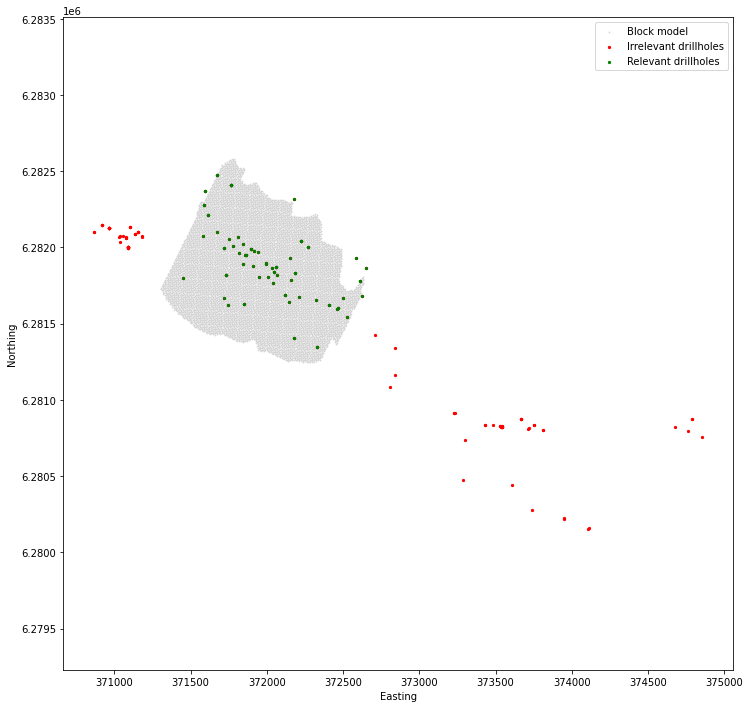

In [196]:
# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12, 12))
    
ax.axis('equal')
ax.scatter(x, y, c='lightgray', s=0.5, label='Block model')
# ax.set_title("Block Model Z View")
ax.set_xlabel("X")
ax.set_ylabel("Y")

data = []
for index, row in collar.iterrows():
    hole_id = row['HOLEID']
    if hole_id in hole_ids:
        data.append([row['HOLEID'], row['EAST'], row['NORTH']])
        
df = pd.DataFrame(data, columns=['hole_id', 'x', 'y'])
df = df.dropna(axis=0)
ax.scatter(df.x, df.y, s=5, c='red', label='Irrelevant drillholes') 
df = df[(371300 < df['x']) & (df['x'] < 372700)]  # filter out drillholes far away
ax.scatter(df.x, df.y, s=5, c='green', label='Relevant drillholes') 

ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
    
ax.legend()
fig.show()
fig.savefig('deliverables/bm-dh-z-view.svg')

whitelist = list(df['hole_id'])

In [197]:
len(df)

81

In [198]:
whitelist

['1075s',
 '1077s',
 '1078s',
 '1079s',
 '1080s',
 '1198',
 '1199',
 '1200',
 '1201',
 '1202',
 '1203',
 '1204',
 '1208',
 '1209',
 '1210',
 '1211',
 '1212',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1221',
 '1222',
 '1223',
 '1224',
 '1225',
 '1226',
 '1227',
 '1228',
 '1229',
 '1230',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1237',
 '1238',
 '1239',
 '1240',
 '1241',
 '1242',
 '1243',
 '1244',
 '1245',
 '1246',
 '200601',
 '200602',
 '200603',
 '200604',
 '944',
 '945',
 '946',
 '947',
 '948',
 '949',
 '954',
 '955',
 '956',
 '957',
 '958',
 '959',
 '960',
 '961',
 '962',
 '963',
 '964',
 'BS0701',
 'BS0702',
 'BS0703',
 'BS0704',
 'BS0705',
 'BS0706',
 'BS0708',
 'BS0709',
 'BS0710',
 'BS0711',
 'BS0712']

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_79109/1572663227.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


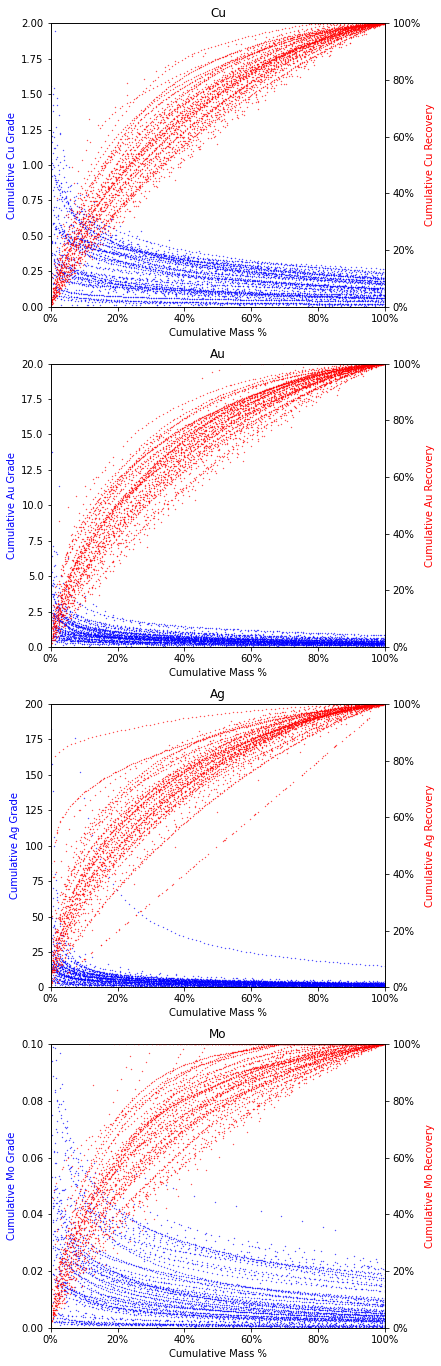

In [199]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    ax_sec = ax.twinx()
    
    ax.set_title(resource_id)
    
    for dh_id in drillholes.keys():
        if dh_id not in blacklist and dh_id in whitelist:
            df = drillholes[dh_id].resources[resource_id].info

            x = df['cml_weight_pct']
            y = df['cml_grade']
            ax.scatter(x, y, color='blue', s=0.1)
            
            y = df['cml_recovery']
            ax_sec.scatter(x, y, color='red', s=0.1)
    
    
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
        pass
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
    elif resource_id == "Ag":
        ax.set_ylim(0, 200)
    elif resource_id == "Mo":
        ax.set_ylim(0, 0.1)
        
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.show()

In [200]:
# input = {
#     filter: "HOLEID == @hole_id" | None,
#     cols_for_het_anal: [ "1", "2", "3" ], # Non-empty
#     weights_config: {
#         assume_equal_weights: true | false,
#         weights_col: "@after - @before", # required iff assume_equal_weights is false
#     }
# }
block_model['weights'] = 1
    
resources = {
    "Au": "AU",
    "Cu": "CU",
    "Ag": "AG",
    "Mo": "MO"
}
for hole_id in hole_ids:

    bm = Grouping('Block Model')
    df = block_model
    weights = df['weights']
    
    for resource_id, column_id in resources.items():
        grades = df[column_id].to_list()
        bm.calculate_resource_heterogeneity(resource_id, df['weights'], grades)

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_79109/2143642463.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


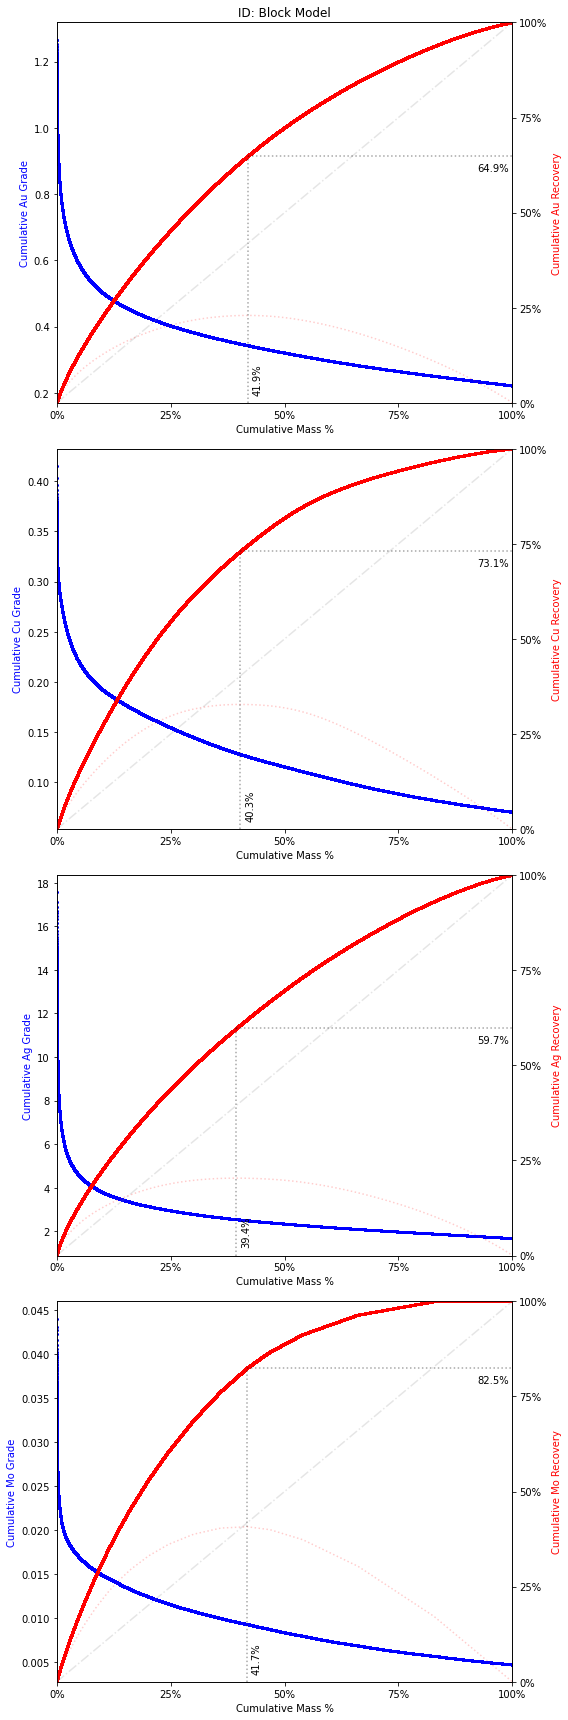

In [201]:
fig = bm.plot_grade_recovery_curves()

fig.tight_layout()
fig.show()
fig.savefig('deliverables/bm-gr-curve.png', dpi=300)